In [1]:
import imageio.v2 as imageio
import glob
import matplotlib.pyplot as plt

In [16]:
files = glob.glob('images1/*.jpg')
name = files[0].split('\\')[-1]
dir = 'images1/img2/'
for file in files:
    name = file.split('\\')[-1]
    if len(name) ==5:
        name = "00"+name
    elif len(name) ==6:
        name = "0"+name
    elif len(name) ==7:
        pass
    image = imageio.imread(file)
    imageio.imwrite(dir + name, image)

In [17]:
def make_video(dir="temp", name="video.mp4", delete=False):
    images = []
    files = glob.glob(f"{dir}\*.jpg")
    for f in files:
        images.append(imageio.imread(f))      
    # files = files.sort(lambda x, y: int(x.split('\\')[-1].split('.')[0]) - int(y.split('\\')[-1].split('.')[0]))
    if name.endswith(".mp4"):
        imageio.mimsave(f"{dir}\{name}", images)
    else:
        imageio.mimsave(f"{dir}\{name}", images, duration=0.1)


In [18]:
make_video(dir=r"Images1\img2", name="final.gif")
make_video(dir=r"Images1\img2", name="final.mp4")

In [2]:
plt.rcdefaults()

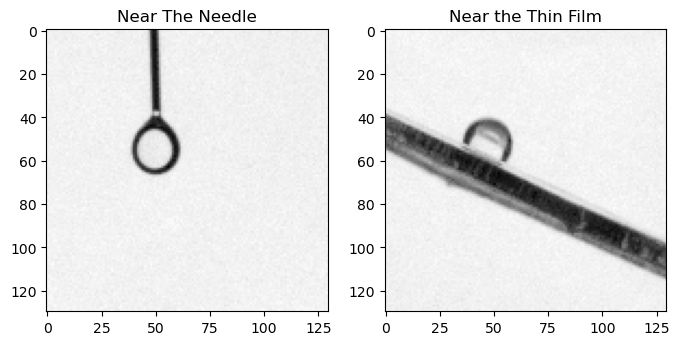

In [17]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
im1 = imageio.imread(r"Images1\1.jpg")
plt.imshow(im1[350:480, 820:950], cmap='gray')
plt.title("Near The Needle")
plt.subplot(1, 2, 2)
im2 = imageio.imread(r"Images1\68.jpg")
plt.imshow(im2[520:650, 820:950], cmap='gray')
plt.title("Near the Thin Film")
plt.savefig("../presentations/first/problems1.png")

In [2]:
import os
files = os.listdir("tiff_files/Varying_Height/")
for f in files:
    name= f.replace(".tif", "")
    os.mkdir(os.path.join("results", name))

In [3]:
len('0.jpg')

5

In [4]:
files = os.listdir("extracted_images/ref")
for f in files:
    if len(f) == 5:
        new_f = "00" + f
    elif len(f) == 6:
        new_f = "0" + f
    else:
        new_f = f
    os.rename(os.path.join("extracted_images/ref", f), os.path.join("extracted_images/ref", new_f))

In [1]:
import os

In [3]:
dirs = os.listdir("extracted_images")
dirs = [d for d in dirs if os.path.isdir(os.path.join("extracted_images", d))]
dirs

['h3',
 'h23_short',
 'h6',
 'h4',
 'h24',
 'h1',
 'h16_short',
 'h22_short',
 'h13_short',
 'h11_short',
 'h20_short',
 'h17_short',
 'h10_short',
 'h1_try',
 'h18_short',
 'h15_short',
 'h9_short',
 'h21_short',
 'h7',
 'h7_short',
 'ref',
 'h14_short',
 'h8_short',
 'h12_short',
 'h25_short',
 'h2',
 'h19_short',
 'h5_short']

In [4]:
new_dirs = os.listdir("results")
new_dirs = [d for d in new_dirs if os.path.isdir(os.path.join("results", d))]
new_dirs

['h3',
 'h6',
 'h4',
 'h24',
 'h1',
 'h13_short',
 'h11_short',
 'h20_short',
 'h10_short',
 'h1_try',
 'h9_short',
 'h7',
 'h7_short',
 'ref',
 'h8_short',
 'h12_short',
 'h25_short',
 'h2',
 'h5_short']

In [5]:
for dir in dirs:
    if dir not in new_dirs:
        os.mkdir(os.path.join("results", dir))